In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandasql as pds
import os
import numpy as np
sns.get_dataset_names()  # default seaborn datasets
path = 'd:/programming/python/datasets'
os.chdir(path)

In [2]:
df = sns.load_dataset('diamonds')
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [28]:
# 1, price of the most expensive diamond.
pds.sqldf("select max(price) as maxPrice from df")

,maxPrice
0,18823


In [4]:
# 2, the average price of a diamond
pds.sqldf("select avg(price) as averagePrice from df")

,averagePrice
0,3932.799722


In [7]:
# 3, how many ideal diamonds are there?
pds.sqldf("select count(*) as idealNum from df where cut='Ideal'")

,idealNum
0,21551


In [113]:
# 4, how many distinct colors are there for diamonds? what are they?
colorsnum = df['color'].nunique()
colors = pds.sqldf("select distinct color from df")
print('there are', colorsnum, 'distinct colors for diamonds.')
colors

there are 7 distinct colors for diamonds.


,color
0,E
1,I
2,J
3,H
4,F
5,G
6,D


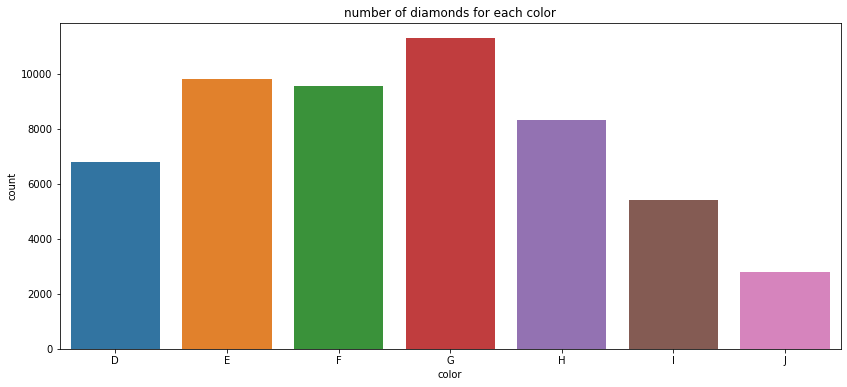

In [109]:
plt.figure(figsize = (14, 6))
plt.title('number of diamonds for each color')
sns.countplot(x = 'color', data = df)
plt.show()

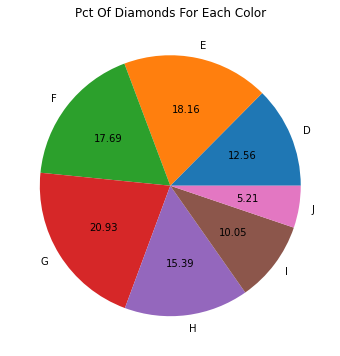

In [115]:
plt.figure(figsize = (14, 6))
plt.title('Pct Of Diamonds For Each Color')
plt.pie(x = 'countC', data = pds.sqldf("select color, count(*) as countC from df group by color"), labels = 'color', autopct = '%.2f' )
plt.show() 

In [23]:
# 5, the median carat of premium diamonds.
df.groupby("cut", as_index = False).median().query("cut=='Premium'")['carat']

1    0.86
Name: carat, dtype: float64

In [92]:
# 6, the average carat for each cut type.
carpercut = pds.sqldf("select cut, avg(carat) as averageCarat from df group by cut")
carpercut  # carat per cut

,cut,averageCarat
0,Fair,1.046137
1,Good,0.849185
2,Ideal,0.702837
3,Premium,0.891955
4,Very Good,0.806381


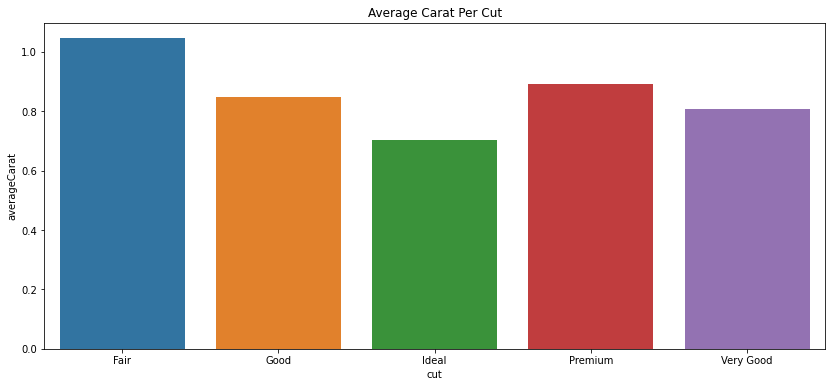

In [114]:
plt.figure(figsize = (14, 6))
sns.barplot(x = "cut", y = "averageCarat", data = carpercut)
plt.title("Average Carat Per Cut")
plt.show()

In [116]:
# 7, the average price for each color. 
prpercolor = pds.sqldf("select color, avg(price) as averagePrice from df group by color")
prpercolor  # average price per color

,color,averagePrice
0,D,3169.954096
1,E,3076.752475
2,F,3724.886397
3,G,3999.135671
4,H,4486.669196
5,I,5091.874954
6,J,5323.818020


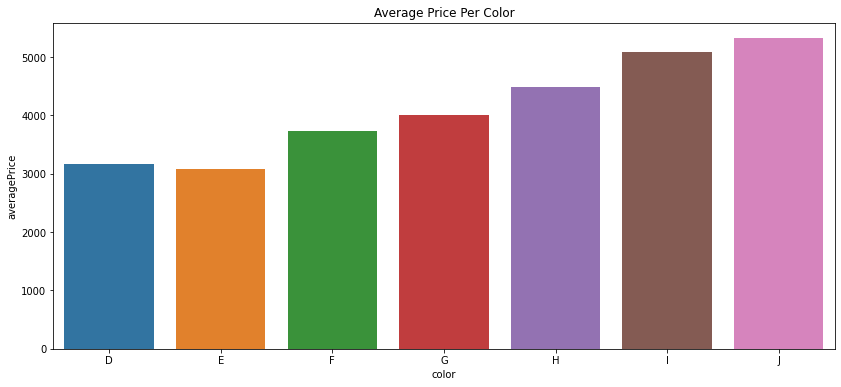

In [119]:
plt.figure(figsize = (14, 6))
plt.title('Average Price Per Color')
sns.barplot(x = 'color', y = 'averagePrice', data = prpercolor)
plt.show()